In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
pip install missingno

  Using cached missingno-0.4.2-py3-none-any.whl (9.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [54]:
import missingno as msno

In [3]:
loan = pd.read_csv('loans.csv')

In [6]:
loan.shape

(1968819, 34)

Notre base de donnée est constituée de `1 968 819 observations` et `34 variables`. Par suite, nous procèderons à la description des différentes variables de la base.

 **Description des variables de la base de données**
 
* 1 - Loan ID : Identifiant de la transaction
* 2 - LOAN_NAME : Nom du prêt
* 3 -	ORIGINAL_LANGUAGE : Langue parlée
* 4 -	DESCRIPTION : Le champ de description a différentes sous-catégories
* 5 -	DESCRIPTION_TRANSLATED : Description textuelle du projet en anglais, espagnol, français ou russe
* 6 -	FUNDED_AMOUNT : Montant du prêt acheté par les prêteurs Kiva
* 7 -	LOAN_AMOUNT : Montant du prêt qui a été remboursé
* 8 -	STATUS : Status du prêt
* 9 -	IMAGE_ID : Image de l'emprunteur
* 10 - VIDEO_ID : Vidéo dans les proﬁls de prêt et les écritures de journal
* 11 - ACTIVITY_NAME : Activité qui sera réalisée avec le montant financé
* 12 - SECTOR_NAME : Secteur industriel auquel appartient l'activité
* 13 - LOAN_USE : Brève description textuelle de l'utilisation qui sera faite du capital financé
* 14 - COUNTRY_CODE : Code à 2 lettres du pays d'origine de l'emprunteur
* 15 - COUNTRY_NAME : Nom du pays de l'emprunteur
* 16 - TOWN_NAME : Ville du pays de l'emprunteur
* 17 - CURRENCY_POLICY : politique de change
* 18 - CURRENCY_EXCHANGE_COVERAGE_RATE : Taux de couverture de change
* 19 - CURRENCY : Monnaie
* 20 - PARTNER_ID : ID du partenaire de terrain
* 21 - POSTED_TIME : Date à laquelle le prêt a été comptabilisé
* 22 - PLANNED_EXPIRATION_TIME : L'heure à laquelle le prêt est prévu d'expirer
* 23 - DISBURSE_TIME : L'heure à laquelle les fonds du prêt ont été remis aux emprunteurs
* 24 - RAISED_TIME : Le temps d'échéance augmenté 
* 25 - LENDER_TERM : Durée fixée pour le prêteur du prêt
* 26 - NUM_LENDERS_TOTAL : Nombre total de prêteur
* 27 - NUM_JOURNAL_ENTRIES : Le nombre total d'écritures de journal pour le prêt
* 28 - NUM_BULK_ENTRIES : Le nombre total d'entrées automatisées ou «groupées»
* 29 - TAGS : Commentaire de l'opération
* 30 - BORROWER_NAMES : nom de l'emprunteur
* 31 - BORROWER_GENDERS : Genre de de l'emprunteur
* 32 - BORROWER_PICTURED : L'emprunteur a-t-il fourni ou non une photo?
* 33 - REPAYMENT_INTERVAL : Durée fixée pour le remboursement du prêt
* 34 - DISTRIBUTION_MODEL : 

In [7]:
loan.head()

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,...,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,1827392,Nelie,English,Nelie is married and works hard to support her...,Nelie is married and works hard to support her...,525.0,525.0,funded,3241689.0,NaN,...,8.0,15,2,1,#Woman-Owned Business,Nelie,female,true,monthly,field_partner
1,339740,Zoila Rosa,Spanish,La Señora Zoila es socia del banco comunal El ...,Zoila is a member of 'El Cisne' (The Swan) com...,675.0,675.0,funded,878599.0,NaN,...,8.0,23,2,1,NaN,Zoila Rosa,female,true,monthly,field_partner
2,1782205,Rosalinda,English,"Rosalinda is a married woman, who is 41 years ...","Rosalinda is a married woman, who is 41 years ...",400.0,400.0,funded,3180067.0,NaN,...,11.0,5,2,1,NaN,Rosalinda,female,true,monthly,field_partner
3,958277,Restita,English,"This is Restita, who is 54 years old. She owns...","This is Restita, who is 54 years old. She owns...",875.0,875.0,funded,1994112.0,NaN,...,7.0,9,2,1,NaN,Restita,female,true,monthly,field_partner
4,1214975,Hejazi,English,"Hejazi, who appears in the photo, is 30 years ...","Hejazi, who appears in the photo, is 30 years ...",1000.0,1000.0,funded,2408080.0,NaN,...,28.0,22,1,1,"#Parent, user_favorite, #Biz Durable Asset, us...",Hejazi,male,true,monthly,field_partner


Avec cette prévisualisation et la description des variables de la base de données, on peut clairement identifier la nature de ces dernières à savoir si elles sont *quantitatives* ou *qaulitatives* et aussi au format *date*.
Afin de voir la considération que python fait de nos variables, nous allons affiché les informations de la base de données.

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968819 entries, 0 to 1968818
Data columns (total 34 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   LOAN_ID                          int64  
 1   LOAN_NAME                        object 
 2   ORIGINAL_LANGUAGE                object 
 3   DESCRIPTION                      object 
 4   DESCRIPTION_TRANSLATED           object 
 5   FUNDED_AMOUNT                    float64
 6   LOAN_AMOUNT                      float64
 7   STATUS                           object 
 8   IMAGE_ID                         float64
 9   VIDEO_ID                         float64
 10  ACTIVITY_NAME                    object 
 11  SECTOR_NAME                      object 
 12  LOAN_USE                         object 
 13  COUNTRY_CODE                     object 
 14  COUNTRY_NAME                     object 
 15  TOWN_NAME                        object 
 16  CURRENCY_POLICY                  object 
 17  CURRENCY

Comme on peut le voir, python considère nos variable date comme qualitative. Ce qui est tout à fait normal étant donné leur format.

Nous allons par la suite transformer ces variables dates en informations utilent pour les analyses à venir. Aussi, pour les autres variables de type object, nous allons les re-codifier en précisant clairement leur type. Cette recodification permettra mieux manipuler les données.

` ***re-codification des varibales*** `
* Variables de type date

In [26]:
print(' le type de POSTED_TIME est :', type(loan['POSTED_TIME']),
      '\n le type de PLANNED_EXPIRATION_TIME est :', type(loan['PLANNED_EXPIRATION_TIME']),
      '\n le type de DISBURSE_TIME est :', type(loan['DISBURSE_TIME']),
      '\n le type de RAISED_TIME est :', type(loan['RAISED_TIME']))

 le type de POSTED_TIME est : <class 'pandas.core.series.Series'> 
 le type de PLANNED_EXPIRATION_TIME est : <class 'pandas.core.series.Series'> 
 le type de DISBURSE_TIME est : <class 'pandas.core.series.Series'> 
 le type de RAISED_TIME est : <class 'pandas.core.series.Series'>


Comme on le voit avec cette sortie, nos variables dates sont considérées commes de `series` par python. Il est à noter que sur
python, ce type de variable est un tableau étiqueté unidimensionnel capable de contenir n'importe quel type de données (entiers, chaînes, nombres à virgule flottante, objets Python, etc.).
Dans la suite nous allons convertir ces variables en variables datetime pour en extraire l'année. Cette conversion nous sera d'un grand avantage dans les prochaines analyses.

In [27]:
# Conversion des variables en datetime

loan["POSTED_TIME"] = pd.to_datetime(loan["POSTED_TIME"])
loan["PLANNED_EXPIRATION_TIME"] = pd.to_datetime(loan["PLANNED_EXPIRATION_TIME"])
loan["DISBURSE_TIME"] = pd.to_datetime(loan["DISBURSE_TIME"])
loan["RAISED_TIME"] = pd.to_datetime(loan["RAISED_TIME"])

loan["POSTED_TIME"].dt
loan["PLANNED_EXPIRATION_TIME"].dt
loan["DISBURSE_TIME"].dt
loan["RAISED_TIME"].dt

In [28]:
loan["POSTED_DATE"] = loan["POSTED_TIME"].dt.year
loan["PLANNED_EXPIRATION_DATE"] = loan["PLANNED_EXPIRATION_TIME"].dt.year
loan["DISBURSE_date"] = loan["DISBURSE_TIME"].dt.year
loan["RAISED_date"] = loan["RAISED_TIME"].dt.year

In [30]:
pd.crosstab(loan["POSTED_DATE"],"freq")

col_0,freq
POSTED_DATE,
2006,3200
2007,26314
2008,50697
2009,81629
2010,92902
2011,113009
2012,133847
2013,140035
2014,174232


De cette sortie, on a retrace ainsi les activités de Kiva de sa création en 2005 jusqu'au 20/10/2020. On constate qu'en 2018, l
kiva a comptabilisé le plus grand nombre de prêt. Naturellement l'année 2006 a le nombre de prêt comptabilisé le plus faible car le structure était à
ces débuts.

* Variables catégorielle

In [40]:
var_categoriel = ['LOAN_NAME','ORIGINAL_LANGUAGE','DESCRIPTION','DESCRIPTION_TRANSLATED','STATUS','ACTIVITY_NAME','SECTOR_NAME','LOAN_USE','COUNTRY_CODE','COUNTRY_NAME','TOWN_NAME','CURRENCY_POLICY','CURRENCY_EXCHANGE_COVERAGE_RATE','CURRENCY','TAGS','BORROWER_NAMES','BORROWER_GENDERS','BORROWER_PICTURED','REPAYMENT_INTERVAL','DISTRIBUTION_MODEL']
loan[var_categoriel] = loan[var_categoriel].astype('category')

In [42]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968819 entries, 0 to 1968818
Data columns (total 38 columns):
 #   Column                           Dtype              
---  ------                           -----              
 0   LOAN_ID                          int64              
 1   LOAN_NAME                        category           
 2   ORIGINAL_LANGUAGE                category           
 3   DESCRIPTION                      category           
 4   DESCRIPTION_TRANSLATED           category           
 5   FUNDED_AMOUNT                    float64            
 6   LOAN_AMOUNT                      float64            
 7   STATUS                           category           
 8   IMAGE_ID                         float64            
 9   VIDEO_ID                         float64            
 10  ACTIVITY_NAME                    category           
 11  SECTOR_NAME                      category           
 12  LOAN_USE                         category           
 13  COUNTRY_CODE

Une fois que nous connaissons le type de nos différentes variables, nous allons par suite identifier celles qui ne serons
pas utiles pour nos analyses et les supprimés pour ne retenir que les pertinentes. Comme par exemple, les variables `ACTIVITY_NAME` ne rapporte pas trop d'information étant donnée la disponibilité de la variable `SECTOR_NAME`; également pour la variable `IMAGE_ID`, on va préferé `BORROWER_PICTURED` qui renseigne si l'emprunteur a fourni sa photo ou pas.

In [56]:
var_suprime = ['LOAN_NAME','ORIGINAL_LANGUAGE','IMAGE_ID','DESCRIPTION','ACTIVITY_NAME','TOWN_NAME','CURRENCY_POLICY','CURRENCY_EXCHANGE_COVERAGE_RATE','TAGS','BORROWER_NAMES']

In [57]:
loan_copy = loan.copy() # On fait copie de la base pour toujours avoir recours à la base source en cas de problème.

In [58]:
loan_copy = loan_copy.drop(var_suprime, axis=1)

In [59]:
loan_copy.shape

(1968819, 28)

## Analyse globale de la base de donnée
L'object de cette partie est de ressortie les caractéristiques globales de la base de données en terme de missing values et duplicates. Par la suite, nous allons procédé à une analyse beaucoup plus fine au niveau de chaque de variable, ce dans l'optique d'identifier les valeurs éventuelles valeurs abérrantes et autres.

* Missing values

<AxesSubplot:>

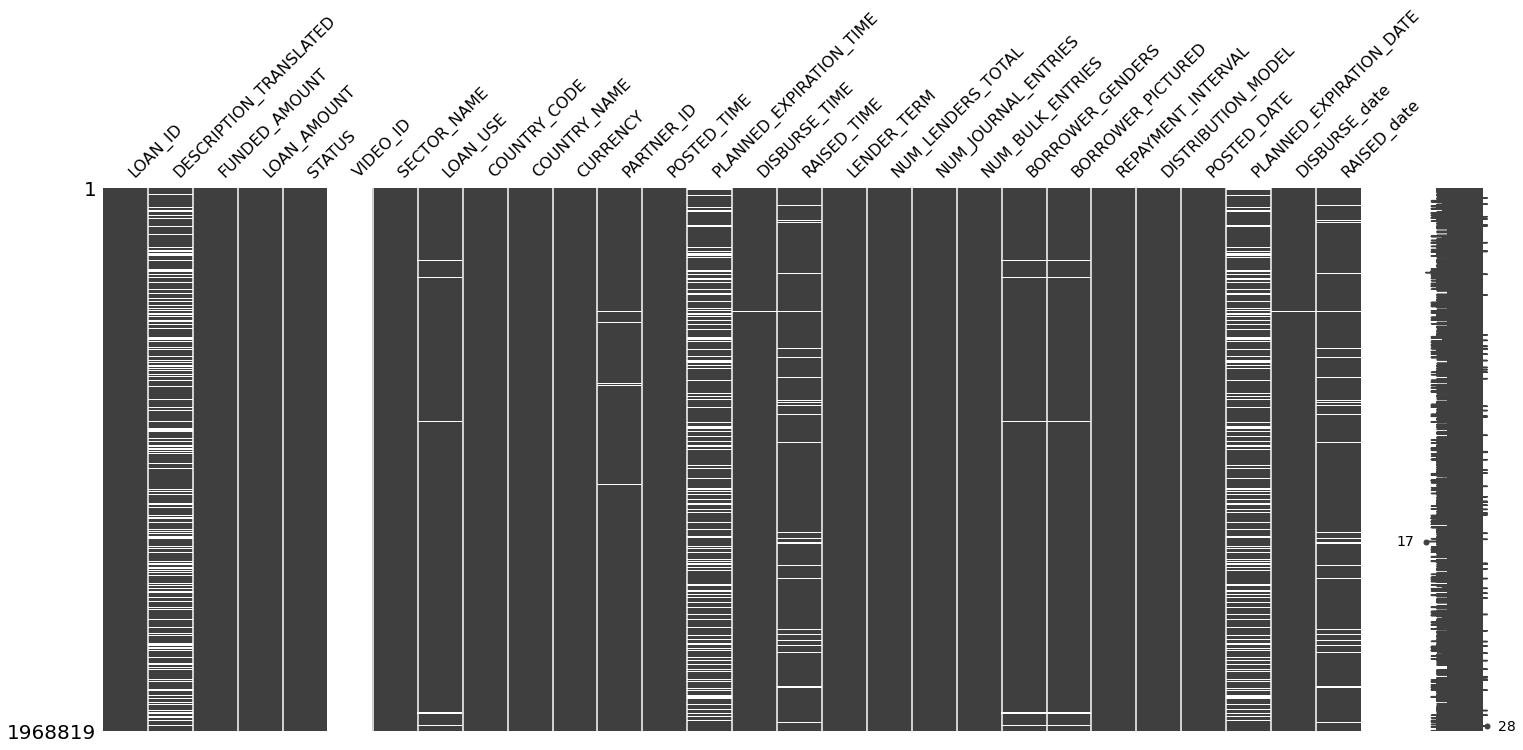

In [60]:
msno.matrix(loan_copy)

L'observation de cette sortie permet de constater que les variables `DESCRIPTION_TRANSLATED`, `VIDEO_ID`, `PLANNED_EXPIRATION_TIME`, `PLANNED_EXPIRATION_DATE`
presentent beaucoup de valeurs manquantes. Etant donné leur faible apport informationnel dans nos analyses,
nous allons nous en débarraser.

In [61]:
var_supprime2 = ['DESCRIPTION_TRANSLATED','VIDEO_ID','PLANNED_EXPIRATION_TIME','PLANNED_EXPIRATION_DATE']

In [62]:
loan_copy = loan_copy.drop(var_supprime2, axis=1)

<AxesSubplot:>

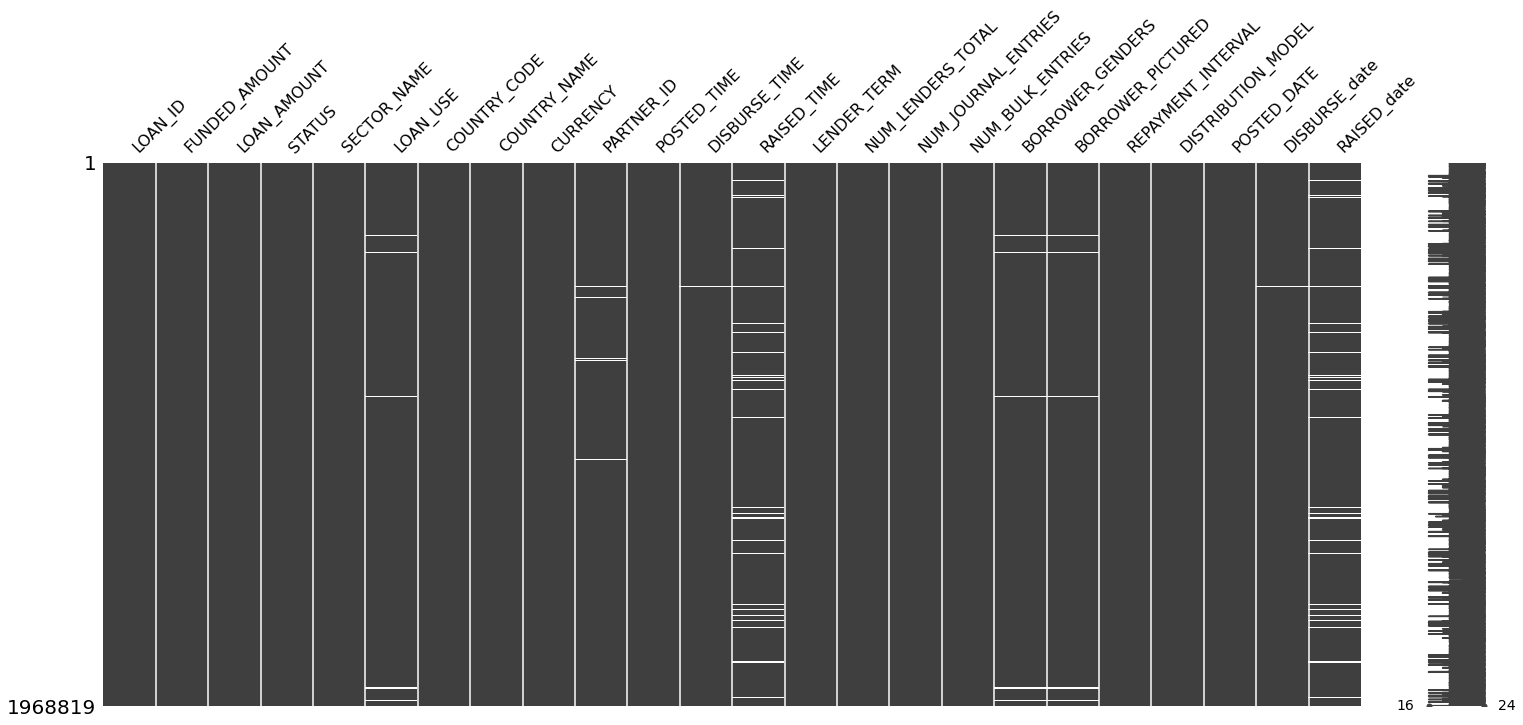

In [63]:
msno.matrix(loan_copy)

* Duplicates

In [64]:
## Nombre de données dupliqués sur la base des id
loan_copy.duplicated(subset=['LOAN_ID' ]).sum()

0

Ainsi, on voit que notre base de données ne comporte pas d'observations dupliquées. Autrement dit, chaque prêt est identifiable par son identifiant.

## Analyse spécifiques des variables
Dans cette partie, nous allons procéder aux éventuelles recodifications, renomages et traitement des variables qui présentent
des incohérences.

In [68]:
var_quanti = ['FUNDED_AMOUNT','LOAN_AMOUNT','PARTNER_ID','LENDER_TERM','NUM_LENDERS_TOTAL','NUM_JOURNAL_ENTRIES','NUM_BULK_ENTRIES']
var_date = ['POSTED_DATE', 'DISBURSE_date', 'RAISED_date']

In [69]:
loan_copy[var_quanti].describe() # Description des variables quantitatives de la base de données.

,FUNDED_AMOUNT,LOAN_AMOUNT,PARTNER_ID,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES
count,1.968819e+06,1.968819e+06,1.948516e+06,1.968795e+06,1.968819e+06,1.968819e+06,1.968819e+06
mean,7.794666e+02,8.235622e+02,1.659668e+02,1.314693e+01,2.142341e+01,1.561344e+00,1.153008e+00
std,1.522751e+03,1.602688e+03,1.047908e+02,7.304365e+00,4.155283e+01,1.093998e+00,5.257283e-01
min,0.000000e+00,2.500000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,2.750000e+02,2.750000e+02,1.080000e+02,8.000000e+00,7.000000e+00,1.000000e+00,1.000000e+00
50%,5.000000e+02,5.000000e+02,1.450000e+02,1.300000e+01,1.400000e+01,1.000000e+00,1.000000e+00
75%,9.000000e+02,9.750000e+02,1.850000e+02,1.400000e+01,2.600000e+01,2.000000e+00,1.000000e+00
max,5.000000e+05,5.000000e+05,6.140000e+02,1.950000e+02,1.526500e+04,1.260000e+02,6.300000e+01


Les princiaples enseingnements du tableau :
  * **FUNDED_AMOUNT** : 
Le minimum des montants empruntés auprès de kiva durant la période d'analyse est de 0. Ce qui est incohérent car un entrepreneur rationel n'irait pas
prêté un tel montant. Ainsi, nous considérerons ces observations comme étant à problème et nous allons litéralement les supprimer.

In [72]:
loan_copy['FUNDED_AMOUNT'].unique()

array([5.25000e+02, 6.75000e+02, 4.00000e+02, 8.75000e+02, 1.00000e+03,
       7.25000e+02, 5.00000e+02, 7.00000e+02, 1.75000e+02, 4.75000e+02,
       6.00000e+02, 3.72500e+03, 3.25000e+02, 2.00000e+02, 2.25000e+02,
       3.00000e+02, 1.30000e+03, 4.25000e+02, 1.02500e+03, 5.75000e+02,
       1.25000e+02, 7.75000e+02, 5.50000e+02, 4.50000e+02, 1.15000e+03,
       2.75000e+02, 1.60000e+03, 3.50000e+02, 1.97500e+03, 1.32500e+03,
       1.50000e+02, 2.50000e+02, 1.50000e+03, 1.00000e+02, 1.65000e+03,
       7.50000e+01, 8.00000e+02, 3.75000e+02, 2.00000e+03, 6.50000e+02,
       1.85000e+03, 1.05000e+03, 2.50000e+03, 1.80000e+03, 1.12500e+03,
       1.07500e+03, 6.25000e+02, 2.80000e+03, 1.00000e+04, 9.00000e+02,
       1.87500e+03, 3.45000e+03, 3.00000e+03, 1.20000e+03, 1.27500e+03,
       3.10000e+03, 1.10000e+03, 1.82500e+03, 1.17500e+03, 1.55000e+03,
       7.50000e+02, 2.27500e+03, 2.05000e+03, 9.25000e+02, 9.50000e+02,
       5.00000e+01, 7.22500e+03, 2.15000e+03, 8.50000e+02, 9.750